# Position estimation experiments

This notebook serves to document various experiments performed on IMU data used to estimate position of a device. 

In [78]:
# Imports
import os
import datetime
import scipy as sp
from scipy import integrate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D


In [79]:
# Load data
session_uuid = "3d60122a-6e13-4b5f-becd-12052e95417a"

# IMU data
parent_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
path_to_imu_data_processed = parent_path + "/datasets/" + "session-" + session_uuid + "/imu_data/processed/"

timestamp = pd.read_csv(path_to_imu_data_processed + "timestamp.csv").values
acceleration = pd.read_csv(path_to_imu_data_processed + "user_acceleration.csv")

In [80]:
def calculate_delta(timestamp_1, timestamp_2):
    """
    Calculate the time delta between image captures 

    return: time delta (in s)
    """
    
    difference = timestamp_1 - timestamp_2
    delta = (difference.seconds * 1) + (difference.microseconds / 1000000)
    
    return delta

In [81]:
# Time delta calculation
# Calculate the average time delta between sensor measurements
time = np.array([datetime.datetime.strptime(x[0], '%Y-%m-%d:%H:%M:%S.%f') for x in timestamp])

deltas = []
for i in range(len(time) - 1):
    deltas.append(calculate_delta(time[i+1], time[i]))

dt = np.array(deltas).mean()
print("Average sample period:\t", dt, "(s)")

Average sample period:	 0.029857923497267763 (s)


In [82]:
# Acceleration
# fig = plt.figure()
# ax = Axes3D(fig)
# df = acceleration
# plt.title('Acceleration')
# ax.plot3D(acceleration.x, acceleration.y, acceleration.z)

# # Velocity
# fig = plt.figure()
# ax = Axes3D(fig)
# plt.title('Velocity')
# velocity = np.zeros(3)
# velocity[0] = integrate.cumulative_trapezoid(y=acceleration['x'].values, dx=dt)
# velocity[1] = integrate.cumulative_trapezoid(y=acceleration['y'].values, dx=dt)
# velocity[2 ]= integrate.cumulative_trapezoid(y=acceleration['z'].values, dx=dt)
# ax.plot3D(velocity[0], velocity[1], velocity[2])

# # Position
# fig = plt.figure()
# ax = Axes3D(fig)
# plt.title('Position')
# position = np.zeros(3)
# position[0] = integrate.cumulative_trapezoid(y=acceleration['x'].values, dx=dt)
# position[1] = integrate.cumulative_trapezoid(y=acceleration['y'].values, dx=dt)
# position[2 ]= integrate.cumulative_trapezoid(y=acceleration['z'].values, dx=dt)
# ax.plot_trisurf(position[0], position[1], position[2], cmap=cm.jet, linewidth=0.1)


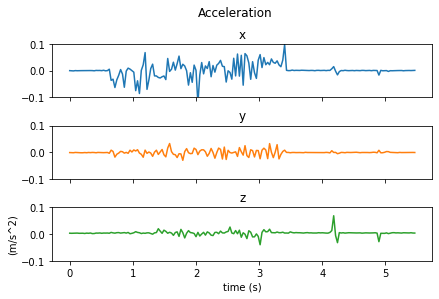

In [83]:
# Acceleration 

startTime = time[0]
ts = [calculate_delta(x, startTime) for x in time]

fig, axs = plt.subplots(3)
fig.tight_layout()
fig.suptitle("Acceleration")
fig.subplots_adjust(top=0.85)

axs[0].plot(ts, acceleration.x, color = "tab:blue")
axs[1].plot(ts, acceleration.y, color = "tab:orange")
axs[2].plot(ts, acceleration.z, color = "tab:green")

axs[0].set_ylim(-0.1, 0.1)
axs[1].set_ylim(-0.1, 0.1)
axs[2].set_ylim(-0.1, 0.1)

axs[0].set_title('x')
axs[1].set_title('y')
axs[2].set_title('z')

axs[2].set_xlabel("time (s)")
axs[2].set_ylabel("(m/s^2)")

for ax in fig.get_axes():
    ax.label_outer()


In [84]:
def approx_integrate(data, dt):
    return np.array([sum(data[:i]) * dt for i in range(len(data))])

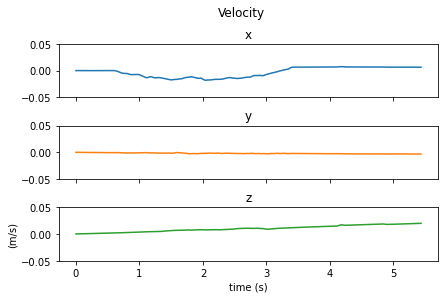

In [85]:
# Velocity

velocity = []
velocity.append(integrate.cumulative_trapezoid(y=acceleration['x'].values, dx=dt))
velocity.append(integrate.cumulative_trapezoid(y=acceleration['y'].values, dx=dt))
velocity.append(integrate.cumulative_trapezoid(y=acceleration['z'].values, dx=dt))

fig, axs = plt.subplots(3)
fig.tight_layout()
fig.suptitle("Velocity")
fig.subplots_adjust(top=0.85)

axs[0].plot(ts[:-1], velocity[0], color = "tab:blue")
axs[1].plot(ts[:-1], velocity[1], color = "tab:orange")
axs[2].plot(ts[:-1], velocity[2], color = "tab:green")

axs[0].set_ylim(-0.05, 0.05)
axs[1].set_ylim(-0.05, 0.05)
axs[2].set_ylim(-0.05, 0.05)

axs[0].set_title('x')
axs[1].set_title('y')
axs[2].set_title('z')

axs[2].set_xlabel("time (s)")
axs[2].set_ylabel("(m/s)")

for ax in fig.get_axes():
    ax.label_outer()


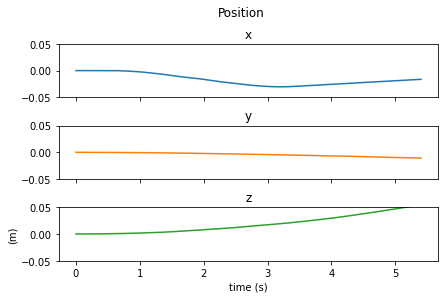

In [86]:
# Position

position = []
position.append(integrate.cumulative_trapezoid(y=velocity[0], dx=dt))
position.append(integrate.cumulative_trapezoid(y=velocity[1], dx=dt))
position.append(integrate.cumulative_trapezoid(y=velocity[2], dx=dt))

fig, axs = plt.subplots(3)
fig.tight_layout()
fig.suptitle("Position")
fig.subplots_adjust(top=0.85)

axs[0].plot(ts[:-2], position[0], color = "tab:blue")
axs[1].plot(ts[:-2], position[1], color = "tab:orange")
axs[2].plot(ts[:-2], position[2], color = "tab:green")

axs[0].set_ylim(-0.05, 0.05)
axs[1].set_ylim(-0.05, 0.05)
axs[2].set_ylim(-0.05, 0.05)

axs[0].set_title('x')
axs[1].set_title('y')
axs[2].set_title('z')

axs[2].set_xlabel("time (s)")
axs[2].set_ylabel("(m)")

for ax in fig.get_axes():
    ax.label_outer()


In [87]:
# Position — 3D view